## Loan Status Prediction 


### Project Overview

This project focuses on predicting loan approval status using a Decision Tree classifier. The workflow includes data preprocessing, exploratory data analysis, feature encoding, model training, and evaluation. The dataset contains demographic and financial information about loan applicants, which is used to train the model to classify applications as approved or rejected. The model's performance is assessed using accuracy, confusion matrix, and classification report, providing insights into its effectiveness for automating loan approval decisions.


## Importing the Dependencies

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

## Uploading the dataset

### About the dataset

This dataset contains information about loan applicants and their loan status. It includes demographic details, financial information, and loan attributes for each applicant. The variables present are:

- **Loan_ID**: Unique identifier for each loan application.
- **Gender**: Gender of the applicant.
- **Married**: Marital status of the applicant.
- **Dependents**: Number of dependents.
- **Education**: Educational qualification (Graduate/Not Graduate).
- **Self_Employed**: Whether the applicant is self-employed.
- **ApplicantIncome**: Income of the applicant.
- **CoapplicantIncome**: Income of the co-applicant.
- **LoanAmount**: Loan amount applied for (in thousands).
- **Loan_Amount_Term**: Term of the loan (in months).
- **Credit_History**: Credit history meets guidelines (1.0 = Yes, 0.0 = No).
- **Property_Area**: Area where the property is located (Urban/Semiurban/Rural).

This dataset is typically used for predicting loan approval status based on applicant details.

In [49]:
ds=pd.read_csv('Loan_data.csv')
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

### Dimension Columns in the Dataset

In [51]:
ds.shape

(614, 13)

### Dataset Information (`info()` method)

In [52]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



### Description of the Dataset


In [53]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Preprocessing

### Filling the null values 

In [54]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
ds['Gender'] = ds['Gender'].fillna(ds['Gender'].mode()[0])
ds['Married'] = ds['Married'].fillna(ds['Married'].mode()[0])
ds['Self_Employed'] = ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0])
ds['LoanAmount'] = ds['LoanAmount'].fillna(ds['LoanAmount'].median())
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mode()[0])
ds['Credit_History'] = ds['Credit_History'].fillna(ds['Credit_History'].mode()[0])
ds['Loan_Status'] = ds['Loan_Status'].fillna(ds['Loan_Status'].mode()[0])
ds['Dependents'] = ds['Dependents'].fillna(ds['Dependents'].mode()[0])


### Most Contributing Columns

The most contributing columns for predicting loan status are typically those that have a significant impact on the applicant's ability to repay the loan and the lender's decision process. Based on domain knowledge and common practices in loan prediction, the following columns are usually the most influential:

- **Credit_History**: Indicates whether the applicant has a history of repaying debts, which is a strong predictor of loan approval.
- **ApplicantIncome**: Higher income generally increases the likelihood of loan approval.
- **LoanAmount**: The amount of loan requested can affect approval, especially relative to income.
- **Loan_Amount_Term**: The duration of the loan may influence repayment ability.
- **CoapplicantIncome**: Additional income from a co-applicant can improve approval chances.
- **Property_Area**: The location of the property can affect risk assessment.
- **Education**: Education level may correlate with income stability.
- **Married**: Marital status can sometimes influence risk evaluation.

Feature importance can be further quantified using model-based techniques after training a classifier.

## Dependent and Independent Variables




In the context of loan status prediction, the variables in the dataset can be categorized as follows:

- **Dependent Variable (Target):**
    - Typically, the target variable is the loan approval status (e.g., `Loan_Status`). However, in the current dataset preview, this column is not shown. If present, it would be the variable we aim to predict.

- **Independent Variables (Features):**
    - **Loan_ID**: Unique identifier for each loan application (usually dropped for modeling).
    - **Gender**: Gender of the applicant.
    - **Married**: Marital status of the applicant.
    - **Dependents**: Number of dependents.
    - **Education**: Educational qualification.
    - **Self_Employed**: Whether the applicant is self-employed.
    - **ApplicantIncome**: Income of the applicant.
    - **CoapplicantIncome**: Income of the co-applicant.
    - **LoanAmount**: Loan amount applied for.
    - **Loan_Amount_Term**: Term of the loan.
    - **Credit_History**: Credit history meets guidelines.
    - **Property_Area**: Area where the property is located.

These independent variables are used as input features to predict the dependent variable (loan approval status).


## Encode Categorical Variables

In [68]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Dependents','Credit_History', 'Loan_Amount_Term', 'LoanAmount']
le = LabelEncoder()
for col in cols:
    ds[col] = le.fit_transform(ds[col])


## Define Features and Labels

In [57]:
x = ds.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = ds['Loan_Status'].map({'Y': 1, 'N': 0})

In [58]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## Train-Test Split

**Train-test split** is a technique used to divide a dataset into two parts: a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance on unseen data. In this project, the dataset was split into `X_train`, `X_test`, `y_train`, and `y_test` to ensure that the logistic regression model is assessed fairly and can generalize well to new cancer diagnosis cases.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Type Casting for 'Dependents' Feature in Train and Test Sets

In [72]:

X_train['Dependents'] = X_train['Dependents'].replace('3+', 3).astype(float)
X_test['Dependents'] = X_test['Dependents'].replace('3+', 3).astype(float)

### Encoding the Target Variable (`Loan_Status`)

In [73]:
y = ds['Loan_Status'].map({'Y': 1, 'N': 0})


In [62]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## Model Training


In [74]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)


## Model Prediction Results

The trained Decision Tree model was used to predict the loan status for the test dataset (`X_test`). The predicted values (`y_pred`) represent the model's classification of each applicant as either approved (1) or not approved (0) for a loan. These predictions can be compared to the actual loan status values (`y_test`) to evaluate the model's performance. This comparison helps in understanding how accurately the model is able to generalize and make predictions on unseen data.


In [79]:
y_pred = model.predict(X_test)

y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

## Model Evaluation

This section evaluates the performance of the trained Decision Tree model for loan status prediction. By comparing the predicted and actual values on the test set, we assess the model’s accuracy, precision, recall, F1-score, and present the confusion matrix. These metrics provide insight into how effectively the model distinguishes between approved and rejected loan applications.

In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7642276422764228

Confusion Matrix:
 [[19 24]
 [ 5 75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



## Sample Prediction

In [80]:

sample_applicant = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [0.0],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [1500.0],
    'LoanAmount': [120.0],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [1.0],
    'Property_Area': [2]
})

sample_prediction = model.predict(sample_applicant)
print("Predicted Loan Status:", "Approved" if sample_prediction[0] == 1 else "Rejected")

Predicted Loan Status: Approved


## Data Visualization

### Visualising Numeric Variables

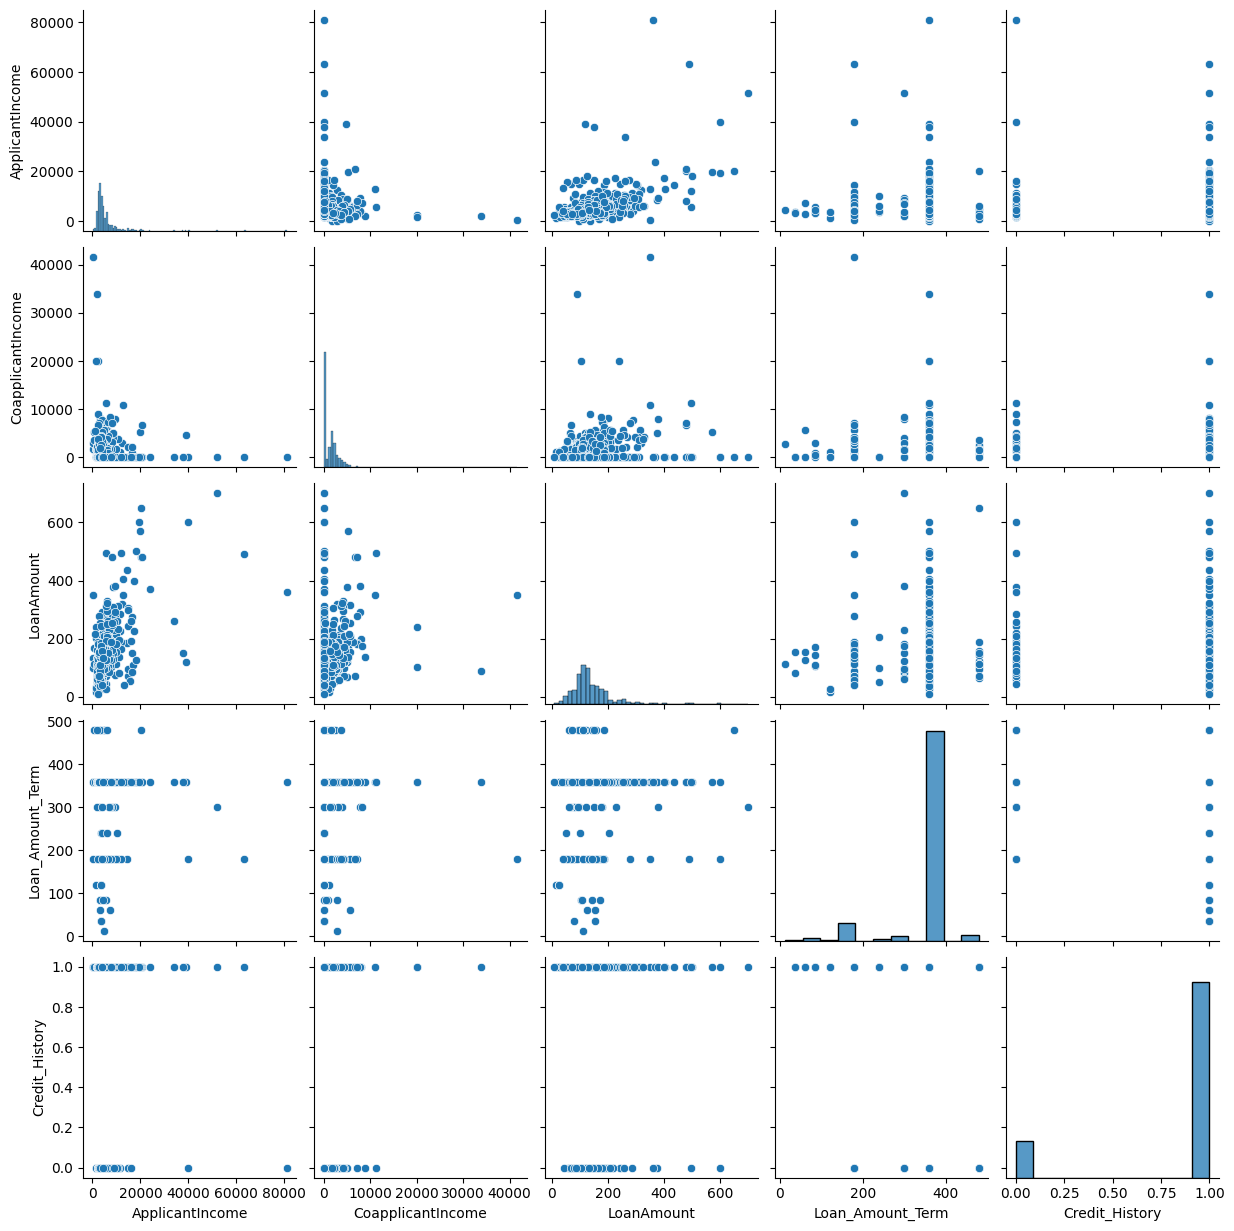

In [ ]:
sns.pairplot(ds)
plt.show()

### Model Visualization


#### #1 Visualization

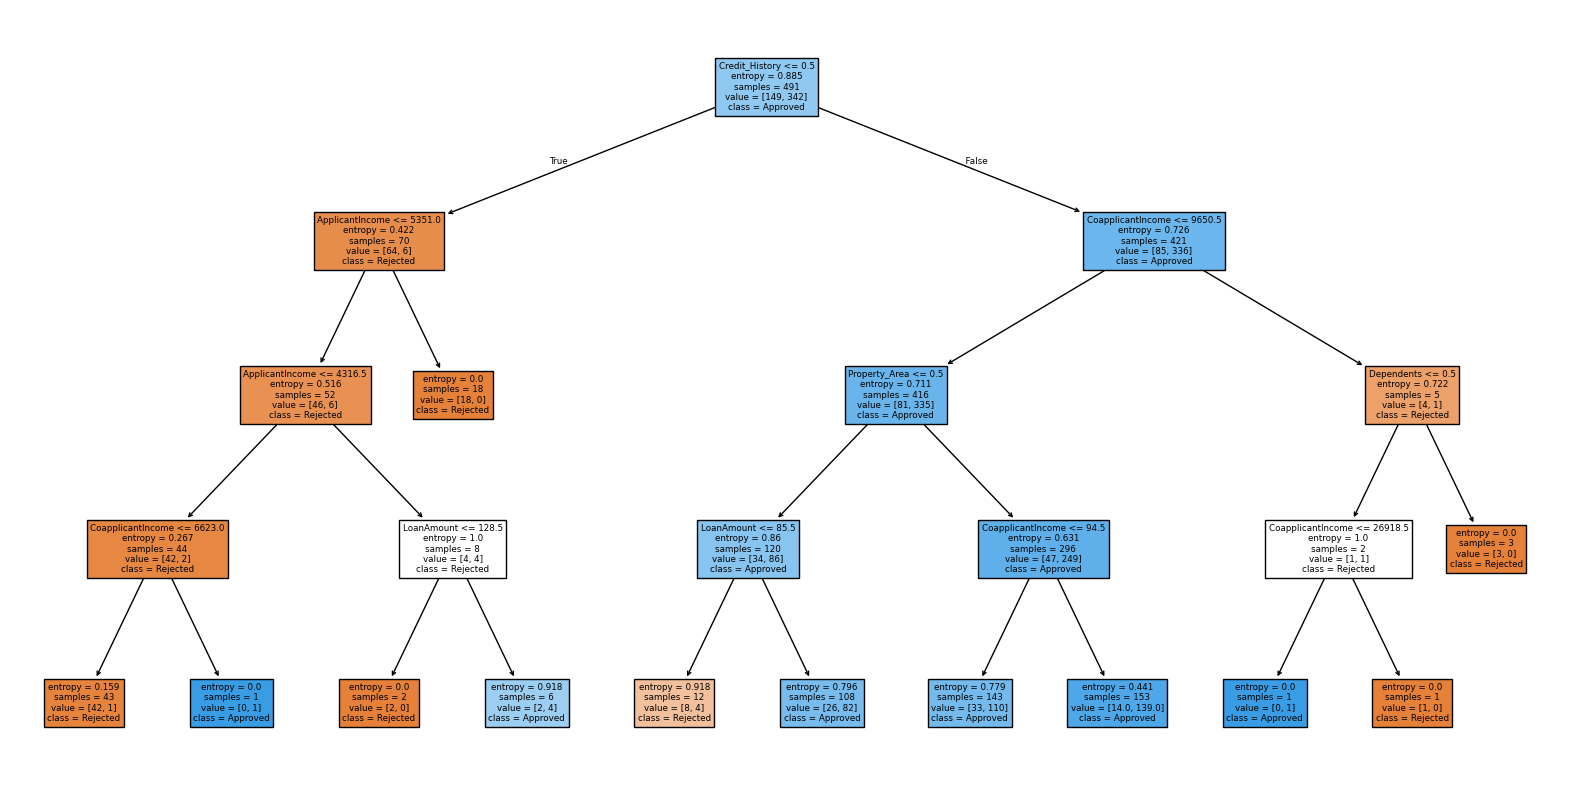

In [76]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=['Rejected', 'Approved'], filled=True)
plt.show()

#### #2 Visualization 

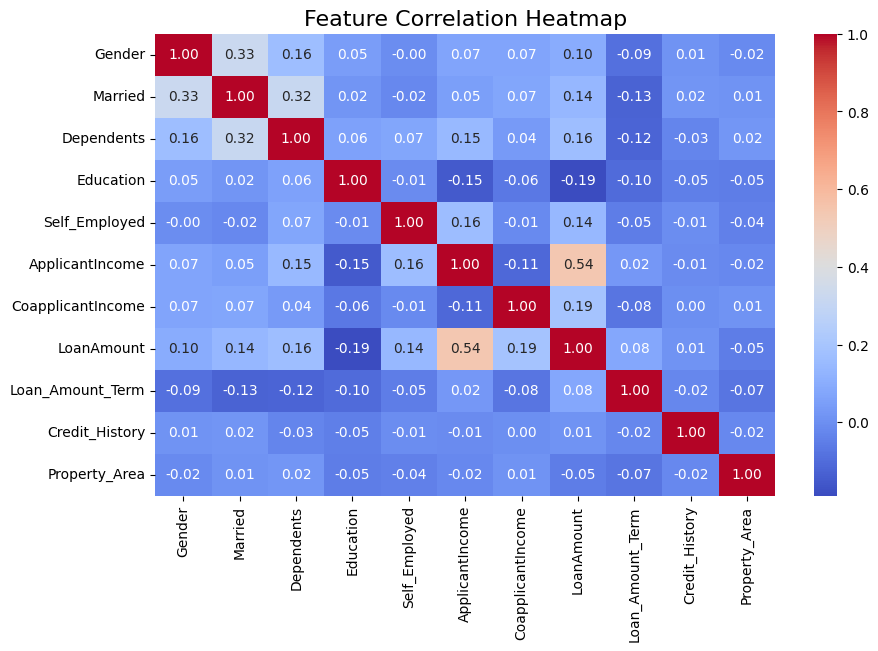

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

#### #3 Visualization

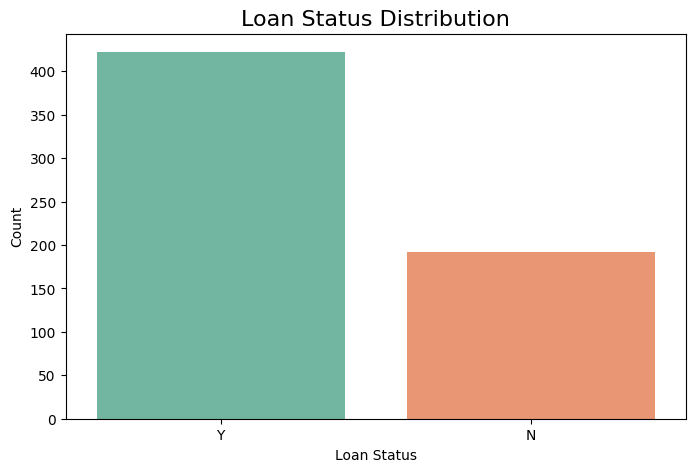

In [87]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', hue='Loan_Status', data=ds, palette='Set2', legend=False)
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

#### #4 Visualization

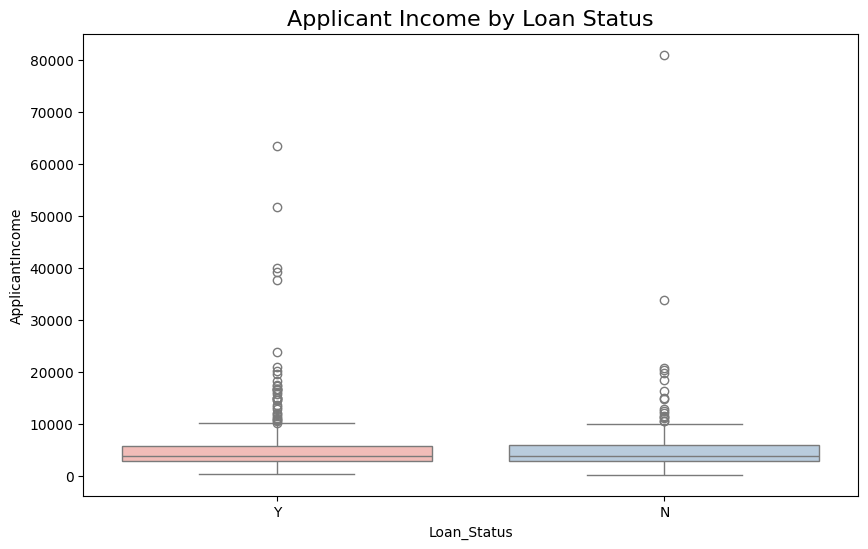

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=ds, hue='Loan_Status', palette='Pastel1', legend=False)
plt.title('Applicant Income by Loan Status', fontsize=16)
plt.show()

## Conclusion

In this project, we developed a Decision Tree classifier to predict loan approval status based on applicant information. Through data preprocessing, feature encoding, and model training, we achieved a model capable of classifying loan applications with reasonable accuracy. The evaluation metrics, including accuracy, confusion matrix, and classification report, demonstrated the model's effectiveness in distinguishing between approved and rejected loans. This approach can assist financial institutions in automating and improving the loan approval process, leading to faster and more consistent decision-making. Further improvements can be made by exploring advanced models, hyperparameter tuning, and incorporating additional features or external data sources.
  
The model achieved a certain level of accuracy (76%), as shown in the evaluation metrics. While the Decision Tree classifier performed reasonably well, its accuracy indicates there is still room for improvement. Factors such as class imbalance, feature selection, and model complexity can influence the results. To further enhance predictive performance, techniques like cross-validation, hyperparameter tuning, or using ensemble methods (e.g., Random Forests or Gradient Boosting) could be explored. Additionally, analyzing misclassified cases may provide insights into patterns the model struggles with, guiding future refinements.

### Assumptions

- Missing values in categorical columns (e.g., Gender, Married, Self_Employed, Dependents, Loan_Status) were imputed using the mode (most frequent value).
- Missing values in numerical columns (e.g., LoanAmount) were imputed using the median.
- All categorical variables were encoded using label encoding to convert them into numerical format for model training.
- The 'Loan_ID' column was dropped as it is an identifier and does not contribute to prediction.
- The dataset was assumed to be representative of the population for loan approval prediction.
- The target variable 'Loan_Status' was mapped to binary values: 1 for approved ('Y') and 0 for not approved ('N').
- Outliers and class imbalance were not explicitly handled in this workflow.
- The Decision Tree model was trained with a fixed random state for reproducibility.

### References
- [Kaggle: Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/data?select=train_u6lujuX_CVtuZ9i.csv)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [UCI Machine Learning Repository: Loan Prediction Dataset](https://archive.ics.uci.edu/ml/datasets.php)